In [1]:
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)
warnings.simplefilter(action="ignore", category=UserWarning)

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mat
import os
import seaborn as sns
import numpy as np
import matplotlib.ticker as mticker
import ast
import json
from matplotlib import colors
from PIL import ImageColor

from sklearn import preprocessing
import re
from libs import read_df

# %#config IPCompleter.greedy=True
# %#matplotlib notebook
# %#matplotlib inline
plt.rcParams["figure.figsize"] = [4, 4]

POINT_PLOT_DODGE = 0.15
sns.set(font_scale=1.25, style="white")
FIGSIZE = [6, 6]

PALETTE = sns.cubehelix_palette(as_cmap=False, n_colors=3, reverse=False, light=0.7)

In [2]:
def shift_value(rgb, shift):
    rgb = ImageColor.getcolor(rgb, "RGB")
    hsv = colors.rgb_to_hsv(rgb)
    hsv[-1] += shift
    return colors.hsv_to_rgb(hsv) / 255


def color_palette(n_colors):
    orig_palette = sns.color_palette("colorblind", as_cmap=True)

    shifts = np.linspace(-0.3, 0.3, n_colors)

    alternate_shifts = shifts.copy()
    alternate_shifts[::2] = shifts[: len(shifts[::2])]
    alternate_shifts[1::2] = shifts[len(shifts[::2]) :]
    palette = [
        shift_value(col, shift) for col, shift in zip(orig_palette, alternate_shifts)
    ]
    return palette

# Quality of Service Performance of Multi-Core Broadband Network Gateways
## Plotting Notebook

### DUT Setup

### Single-core performance
#### Kundel et. al

In [3]:
kundel_df = pd.DataFrame()
experiment_labels = ["none", "1 Gbps", "9 Gbps"]

for experiment in experiment_labels:
    output_dir = f"../output/ixia/kundel/{experiment}"

    for direc, sub_direc, files in os.walk(output_dir):
        if "discarded" in direc:
            continue

        if files == []:
            continue

        if "old" in direc:
            continue

        t = dict()
        misses = 0
        drops = 0
        vectors = 0
        calls = 0
        no_buf = 0
        vector_rate = 0.0
        nworkers = 0

        for file in files:

            if "balanced" in file or "unbalanced" in file:
                with open(direc + "/" + file, "r") as f:
                    core = read_pcm_core(f)

                    exp_id = file.split("_")[-1].strip("csv")
                    core["id"] = exp_id
                    core["label"] = experiment

                    memory = pd.concat([memory, core])

            if "csv" in file and "Traffic Item" in file and "columns" not in file:
                t = pd.read_csv(direc + "/" + file)

                exp_id = file.split(" ")[0]

                t["id"] = exp_id
                t["label"] = experiment

                # label_string = experiment.split("-")

                kundel_df = pd.concat([kundel_df, t], ignore_index=True)

In [4]:
(
    kundel_df[kundel_df["Traffic Item"] == "Traffic Item 1"]
    .groupby(["label"])[
        [
            "Cut-Through Min Latency (ns)",
            "Cut-Through Avg Latency (ns)",
            "Cut-Through Max Latency (ns)",
        ]
    ]
    .mean()
    - 24 * 10**3
)

,Cut-Through Min Latency (ns),Cut-Through Avg Latency (ns),Cut-Through Max Latency (ns)
label,,,
1 Gbps,7356.2,10481.4,24853.8
9 Gbps,20031.2,31094.4,105500.4
none,7453.8,8153.0,25763.6


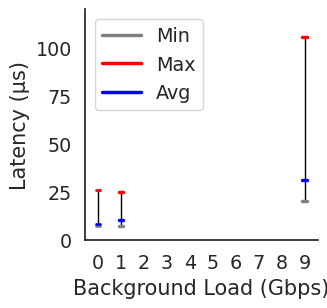

In [12]:
%matplotlib inline
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=[3,3])

pd_df = (
    kundel_df[kundel_df["Traffic Item"] == "Traffic Item 1"]
    .groupby(["label"])[
        [
            "Cut-Through Min Latency (ns)",
            "Cut-Through Avg Latency (ns)",
            "Cut-Through Max Latency (ns)",
        ]
    ]
    .mean()
    - 24 * 10**3
).reset_index()

min_list = pd_df[pd_df['label'] == '1 Gbps']['Cut-Through Min Latency (ns)']/10**3
max_list = pd_df[pd_df['label'] == '1 Gbps']['Cut-Through Max Latency (ns)']/10**3
avg_list = pd_df[pd_df['label'] == '1 Gbps']['Cut-Through Avg Latency (ns)']/10**3

l1, = plt.plot([1, 1,], [min_list[0],max_list[0]], color='black', linewidth=1, label='')  # Plot vertical line for min-max range
l2, = plt.plot([0.9, 1.1,], [min_list[0],min_list[0]], color='gray', linewidth=2.5, label='Min')  # Plot horizontal line for min-max range
l3, = plt.plot([0.9, 1.1,], [max_list[0],max_list[0]], color='red', linewidth=2.5, label='Max')  # Plot horizontal line for min-max range
l4, = plt.plot([0.9, 1.1,], [avg_list[0],avg_list[0]], color='blue', linewidth=2.5, label='Avg')  # Plot horizontal line for min-max range

min_list = pd_df[pd_df['label'] == '9 Gbps']['Cut-Through Min Latency (ns)']/10**3
max_list = pd_df[pd_df['label'] == '9 Gbps']['Cut-Through Max Latency (ns)']/10**3
avg_list = pd_df[pd_df['label'] == '9 Gbps']['Cut-Through Avg Latency (ns)']/10**3

plt.plot([9, 9,], [min_list[1],max_list[1]], color='black', linewidth=1)  # Plot vertical line for min-max range
plt.plot([8.9, 9.1,], [min_list[1],min_list[1]], color='gray', linewidth=2.5)  # Plot horizontal line for min-max range
plt.plot([8.9, 9.1,], [max_list[1],max_list[1]], color='red', linewidth=2.5)  # Plot horizontal line for min-max range
plt.plot([8.9, 9.1,], [avg_list[1],avg_list[1]], color='blue', linewidth=2.5)  # Plot horizontal line for min-max range

min_list = pd_df[pd_df['label'] == 'none']['Cut-Through Min Latency (ns)']/10**3
max_list = pd_df[pd_df['label'] == 'none']['Cut-Through Max Latency (ns)']/10**3
avg_list = pd_df[pd_df['label'] == 'none']['Cut-Through Avg Latency (ns)']/10**3

plt.plot([0, 0,], [min_list[2],max_list[2]], color='black', linewidth=1)  # Plot vertical line for min-max range
plt.plot([-0.1, 0.1,], [min_list[2],min_list[2]], color='gray', linewidth=2)  # Plot horizontal line for min-max range
plt.plot([-0.1, 0.1,], [max_list[2],max_list[2]], color='red', linewidth=2)  # Plot horizontal line for min-max range
plt.plot([-0.1, 0.1,], [avg_list[2],avg_list[2]], color='blue', linewidth=2)  # Plot horizontal line for min-max range

plt.ylabel('Latency (μs)')
plt.xlabel('Background Load (Gbps)')
#ax1.set_yscale('log')
ax1.set_ylim([-0.2, 120])
ax1.set_xticks([i for i in range(0,10)], [i for i in range(0,10)])
sns.despine()
plt.legend(handles = [l2, l3, l4])

fig.savefig("../output_figures/new.svg", bbox_inches = "tight")

In [6]:
(kundel_df[kundel_df['Traffic Item'] == 'Traffic Item 1'].groupby(['label'])[['Min Delay Variation (ns)', 'Avg Delay Variation (ns)', 'Max Delay Variation (ns)']]).mean()

,Min Delay Variation (ns),Avg Delay Variation (ns),Max Delay Variation (ns)
label,,,
1 Gbps,0.0,1817.0,16260.4
9 Gbps,0.0,5906.0,65094.6
none,0.0,376.4,17619.6


#### Batch size

In [46]:
batch = pd.DataFrame()
flow = pd.DataFrame()
experiment_labels = [
    "batch_pdv",
]

for experiment in experiment_labels:
    output_dir = f"../output/ixia/{experiment}"

    for direc, sub_direc, files in os.walk(output_dir):
        if "discarded" in direc:
            continue

        if files == []:
            continue

        if "old" in direc:
            continue

        t = dict()
        misses = 0
        drops = 0
        vectors = 0
        calls = 0
        no_buf = 0
        vector_rate = 0.0
        nworkers = 0

        for file in files:
            #print(direc.replace(output_dir, "").split("/"))
            none, label = direc.replace(output_dir, "").split("/")
            #
            
            if "csv" in file and "Test Summary" in file and "columns" not in file:
                t = pd.read_csv(direc + "/" + file)

                exp_id = file.split(" ")[0]

                t["id"] = exp_id
                t["label"] = label

                # label_string = experiment.split("-")

                batch = pd.concat([batch, t], ignore_index=True)
            
            if "csv" in file and "Flow Statistics" in file and "columns" not in file:
                t = pd.read_csv(direc + "/" + file)

                exp_id = file.split(" ")[0]
                
                t["id"] = exp_id
                t["label"] = int(label)
                # t["exp"] = int(exp)

                #label_string = label.split("-")

                flow = pd.concat([flow, t], ignore_index=True)

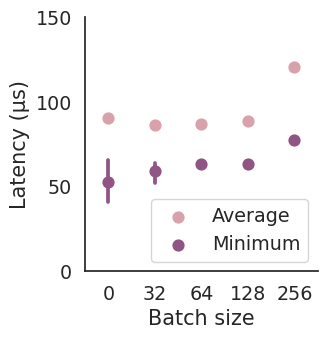

In [77]:
%matplotlib inline
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=[3, 3.3])

flow_melted = pd.melt(
    flow[flow['Traffic Item'] == 'Traffic Item 1'],
    id_vars = ['label', 'id'],
    value_vars =[
        'Cut-Through Avg Latency (ns)',
        'Cut-Through Min Latency (ns)',
        #'Cut-Through Max Latency (ns)',
    ]
)
flow_melted = flow_melted.replace(to_replace="Cut-Through Avg Latency (ns)", value="Average")
flow_melted = flow_melted.replace(to_replace="Cut-Through Min Latency (ns)", value="Minimum")
flow_melted.eval("value = value - 5", inplace=True)

fig1 = sns.pointplot(
    data=flow_melted,
    x='label',
    y=flow_melted["value"]/10**3,
    units="id",
    hue='variable',
    ax=ax1,
    palette = PALETTE,
    ci=95,
    join = False,
    # hue_order = ['1stream],
    # hue_order = [64, 256, 512, 1500],
)

ax1.set(
    ylabel="Latency (μs)",
    xlabel="Batch size",
    ylim=[-0.2, 150],
   #title = 'Forwarding thread\n ST CPU at 3 GHz'
)
plt.setp(fig.lines, linewidth=1.25)
ax1.legend(title='', loc='lower right')

sns.despine()

# fig.savefig("../output_figures/min_avg_latency_batch.pdf", bbox_inches = "tight")

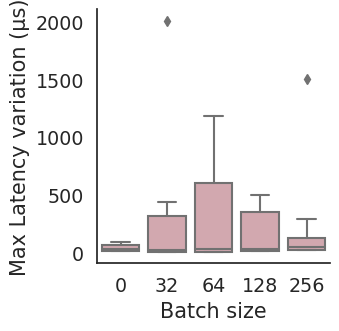

In [9]:
%matplotlib inline
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=[3,3.3])

flow_melted = pd.melt(
    flow[flow['Traffic Item'] == 'Traffic Item 1'],
    id_vars = ['label', 'id'],
    value_vars =[
        'Avg Delay Variation (ns)',
        'Max Delay Variation (ns)',
    ]
)
flow_melted = flow_melted.replace(to_replace="Avg Delay Variation (ns)", value="Average")
flow_melted = flow_melted.replace(to_replace="Min Delay Variation (ns)", value="Minimum")


fig1 = sns.boxplot(
    data=flow_melted,
    x='label',
    y=flow_melted["value"]/10**3,
    #units="id",
    #hue='variable',
    ax=ax1,
    color = [0.8507598215729224, 0.6322174528970308, 0.6702243543099417],
    
    #palette = PALETTE,
    #ci=95,
    #err_style="bars",
    #markersize=1,
    #errorwidth=3,
    #join=False,
    #linestyles="--",
    #linewidth=0.005,
    # hue_order = ['1stream],
    # hue_order = [64, 256, 512, 1500],
)

ax1.set(
    ylabel="Max Latency variation (μs)",
    xlabel="Batch size",
    #ylim=[-0.2, 60],
   #title = 'Forwarding thread\n ST CPU at 3 GHz'
)
plt.setp(fig.lines, linewidth=1.25)
# ax1.legend(title='', loc='upper left')

sns.despine()

# fig.savefig("../output_figures/max_latency_variation_batch.pdf", bbox_inches = "tight")

### Multi-core
#### Use of port capacity

In [113]:
baseline_df = pd.DataFrame()
memory = pd.DataFrame()
experiment_labels = [
    "baseline",
]

for experiment in experiment_labels:
    output_dir = f"../output/ixia/{experiment}"

    for direc, sub_direc, files in os.walk(output_dir):
        if "discarded" in direc:
            continue

        if files == []:
            continue

        if "old" in direc:
            continue

        t = dict()
        misses = 0
        drops = 0
        vectors = 0
        calls = 0
        no_buf = 0
        vector_rate = 0.0
        nworkers = 0

        for file in files:
            none, exp, label = direc.replace(output_dir, "").split("/")
            #print(direc.replace(output_dir, "").split("/"))
            
            if "csv" in file and "Test Summary" in file and "columns" not in file:
                t = pd.read_csv(direc + "/" + file)

                exp_id = file.split(" ")[0]

                t["id"] = exp_id
                t["label"] = int(label.strip('gbps'))
                t["exp"] = exp

                # label_string = experiment.split("-")

                baseline_df = pd.concat([baseline_df, t], ignore_index=True)

In [114]:
baseline_df = baseline_df.replace(to_replace="Full", value="4 Threads")

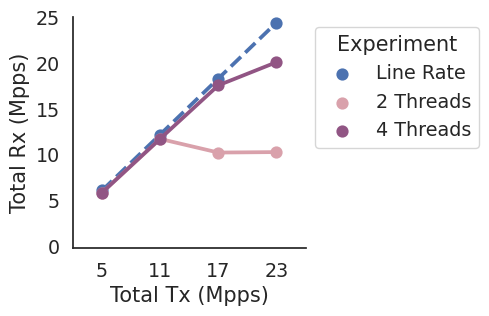

In [115]:
%matplotlib inline
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=[3,3])

ideal_df = pd.DataFrame([(i*10**9/8/512,i,'Line Rate') for i in range(25, 125, 25)])

sns.pointplot(
    x = ideal_df[0]/10**6,
    y = ideal_df[0]/10**6,
    hue = ideal_df[2],
    join=True,
    linestyles="--",
)

fig1 = sns.pointplot(
    data=baseline_df,
    x=(baseline_df['Tx Frame Rate']/10**6).astype(int),
    y=baseline_df["Rx Frame Rate"]/10**6,
    units="id",
    hue='exp',
    ax=ax1,
    palette = PALETTE,
    ci=95,
    #err_style="bars",
    #markersize=1,
    #errorwidth=3,
    #join=True,
    #linestyles="--",
    #linewidth=0.005,
    # hue_order = ['1stream],
    # hue_order = [64, 256, 512, 1500],
)

ax1.set(
    ylabel="Total Rx (Mpps)",
    xlabel="Total Tx (Mpps)",
    ylim=[-0.2, 25],
   # title = 'Forwarding thread\n ST CPU at 3 GHz'
)
plt.setp(fig.lines, linewidth=1.25)
ax1.legend(title='Experiment', bbox_to_anchor=(1,1))

sns.despine()

# fig.savefig("../output_figures/suboptimal_util.svg", bbox_inches = "tight")

#### Traffic isolation

In [84]:
instance_df = pd.DataFrame()
overall_df = pd.DataFrame()
instance_memory = pd.DataFrame()
experiment_labels = [
    "50gbps_balanced_pdv",
    "50gbps_unbalanced_pdv",
]

for experiment in experiment_labels:
    output_dir = f"../output/ixia/memory_access/{experiment}"

    for direc, sub_direc, files in os.walk(output_dir):
        if "discarded" in direc:
            continue

        if files == []:
            continue

        if "old" in direc:
            continue

        t = dict()
        misses = 0
        drops = 0
        vectors = 0
        calls = 0
        no_buf = 0
        vector_rate = 0.0
        nworkers = 0

        for file in files:
            #none = direc.replace(output_dir, "").split("/")
            #print(direc.replace(output_dir, "").split("/"))

            if "csv" in file and "Flow Statistics" in file and "columns" not in file:
                t = pd.read_csv(direc + "/" + file)

                exp_id = file.split(" ")[0]

                t["id"] = exp_id
                t["label"] = experiment

                #label_string = label.split("-")

                instance_df = pd.concat([instance_df, t], ignore_index=True)
                
            if "csv" in file and "Summary Statistics" in file and "columns" not in file:
                t = pd.read_csv(direc + "/" + file)

                exp_id = file.split(" ")[0]

                t["id"] = exp_id
                t["label"] = experiment

                #label_string = label.split("-")

                overall_df = pd.concat([overall_df, t], ignore_index=True)

In [85]:
overall_df['Ethernet II:Destination MAC Address'] = 'All instances'
#new_overall_df = overall_df[['Cut-Through Avg Latency (ns)', 'label']]
instance_df = pd.concat([instance_df, overall_df])
instance_df = instance_df.replace(to_replace="50gbps_balanced_pdv", value="Uniform")
instance_df = instance_df.replace(to_replace="50gbps_unbalanced_pdv", value="Non-Uniform")
instance_memory = instance_memory.replace(to_replace="50gbps_balanced_pdv", value="Uniform")
instance_memory = instance_memory.replace(to_replace="50gbps_unbalanced_pdv", value="Non-Uniform")

instance_df = instance_df.replace(to_replace="Traffic Item 1", value="TC0")
instance_df = instance_df.replace(to_replace="Traffic Item 2", value="TC1")
instance_df = instance_df.replace(to_replace="Traffic Item 3", value="TC2")
instance_df = instance_df.replace(to_replace="Traffic Item 4", value="TC3")

instance_df = instance_df.replace(to_replace="00:00:00:01:00:01", value="1")
instance_df = instance_df.replace(to_replace="00:00:00:01:00:03", value="2")
instance_df = instance_df.replace(to_replace="00:00:00:01:00:05", value="3")
instance_df = instance_df.replace(to_replace="00:00:00:01:00:07", value="4")

In [86]:
t = instance_df.groupby(["label", "Ethernet II:Destination MAC Address", "Traffic Item"])[
    #"Tx L1 Rate (bps)"
    "Tx Frame Rate"
].mean().reset_index().groupby(["label", "Ethernet II:Destination MAC Address"]).sum()
t = t.reset_index()

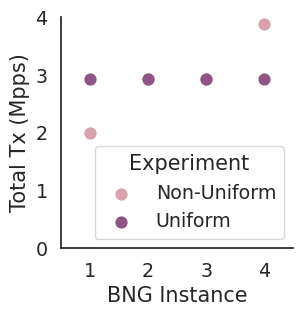

In [87]:
%matplotlib inline
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=[3, 3])

p_df = instance_df[instance_df['Ethernet II:Destination MAC Address'] != 'All instances']
fig1 = sns.pointplot(
    data=t,
    x="Ethernet II:Destination MAC Address",
    y=(t['Tx Frame Rate']/10**6),
    #units="id",
    hue='label',
    ax=ax1,
    palette = PALETTE,
    ci=95,
    join=False,
    # hue_order = ['1stream],
    # hue_order = [64, 256, 512, 1500],
)

ax1.set(
    ylabel="Total Tx (Mpps)",
    xlabel="BNG Instance",
    ylim=[-0, 4],
   # title = 'Forwarding thread\n ST CPU at 3 GHz'
)
plt.setp(fig.lines, linewidth=1.25)
ax1.legend(title='Experiment', loc='lower right')
sns.despine()
# fig.savefig("../output_figures/multiple_instances_tput.pdf", bbox_inches = "tight")

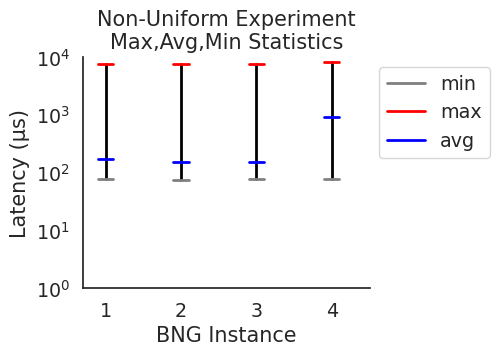

In [88]:
%matplotlib inline
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=[3.7,3])

Exp = 'Non-Uniform'

pd_df = pd.melt(
    instance_df,
    id_vars = ["Ethernet II:Destination MAC Address", 'label'],
    value_vars = ["Cut-Through Max Latency (ns)"]
)
pd_df = pd_df[pd_df['Ethernet II:Destination MAC Address'] != 'All instances']

max_uniform_list = (pd_df[pd_df['label'] == Exp].groupby(['Ethernet II:Destination MAC Address', 'label']).mean()/10**3)['value']

pd_df = pd.melt(
    instance_df,
    id_vars = ["Ethernet II:Destination MAC Address", 'label'],
    value_vars = ["Cut-Through Min Latency (ns)"]
)
pd_df = pd_df[pd_df['Ethernet II:Destination MAC Address'] != 'All instances']

min_uniform_list = (pd_df[pd_df['label'] == Exp].groupby(['Ethernet II:Destination MAC Address', 'label']).mean()/10**3)['value']

pd_df = pd.melt(
    instance_df,
    id_vars = ["Ethernet II:Destination MAC Address", 'label'],
    value_vars = ["Cut-Through Avg Latency (ns)"]
)
pd_df = pd_df[pd_df['Ethernet II:Destination MAC Address'] != 'All instances']

avg_uniform_list = (pd_df[pd_df['label'] == Exp].groupby(['Ethernet II:Destination MAC Address', 'label']).mean()/10**3)['value']
# plt.figure(figsize=(3, 3))
plt.boxplot([[], []], showfliers=False)  # Create an empty boxplot without outliers

plt.plot([1, 1,], [min_uniform_list[0],max_uniform_list[0]], color='black', linewidth=2)  # Plot vertical line for min-max range
plt.plot([2, 2,], [min_uniform_list[1],max_uniform_list[1]], color='black', linewidth=2)  # Plot vertical line for min-max range
plt.plot([3, 3,], [min_uniform_list[2],max_uniform_list[2]], color='black', linewidth=2)  # Plot vertical line for min-max range
plt.plot([4, 4,], [min_uniform_list[3],max_uniform_list[3]], color='black', linewidth=2)  # Plot vertical line for min-max range

min_line = plt.plot([0.9, 1.1,], [min_uniform_list[0],min_uniform_list[0]], color='gray', linewidth=2, label='min')  # Plot vertical line for min-max range
plt.plot([1.9, 2.1], [min_uniform_list[1],min_uniform_list[1]], color='gray', linewidth=2)  # Plot vertical line for min-max range
plt.plot([2.9, 3.1], [min_uniform_list[2],min_uniform_list[2]], color='gray', linewidth=2)  # Plot vertical line for min-max range
plt.plot([3.9, 4.1], [min_uniform_list[3],min_uniform_list[3]], color='gray', linewidth=2)  # Plot vertical line for min-max range

max_line = plt.plot([0.9, 1.1,], [max_uniform_list[0],max_uniform_list[0]], color='red', linewidth=2, label='max')  # Plot vertical line for min-max range
plt.plot([1.9, 2.1], [max_uniform_list[1],max_uniform_list[1]], color='red', linewidth=2)  # Plot vertical line for min-max range
plt.plot([2.9, 3.1], [max_uniform_list[2],max_uniform_list[2]], color='red', linewidth=2)  # Plot vertical line for min-max range
plt.plot([3.9, 4.1], [max_uniform_list[3],max_uniform_list[3]], color='red', linewidth=2)  # Plot vertical line for min-max range

avg_line = plt.plot([0.9, 1.1], [avg_uniform_list[0],avg_uniform_list[0]], color='blue', linewidth=2, label='avg')  # Plot horizontal line for average
plt.plot([1.9, 2.1], [avg_uniform_list[1],avg_uniform_list[1]], color='blue', linewidth=2)  # Plot horizontal line for average
plt.plot([2.9, 3.1], [avg_uniform_list[2],avg_uniform_list[2]], color='blue', linewidth=2)  # Plot horizontal line for average
plt.plot([3.9, 4.1], [avg_uniform_list[3],avg_uniform_list[3]], color='blue', linewidth=2)  # Plot horizontal line for average

plt.xlim(0.7, 4.5)

plt.xticks([1, 2, 3, 4], [1, 2, 3, 4])
plt.title(Exp+' Experiment\nMax,Avg,Min Statistics')

plt.ylabel('Latency (μs)')
plt.xlabel('BNG Instance')
ax1.set_yscale('log')
ax1.set_ylim([1, 10000])
# curves = min_line + max_line + avg_line

# abs = [curve.get_label() for curve in curves]
plt.legend(loc=0, bbox_to_anchor=(1,1))

#plt.legend(handles=[max_line, avg_line, min_line])

sns.despine()
# fig.tight_layout(pad=0.5)
plt.show()

# fig.savefig("../output_figures/multiple_instances_non_uniform.pdf", bbox_inches = "tight")

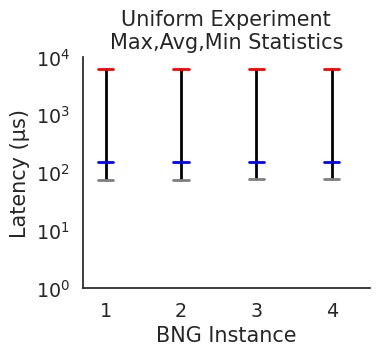

In [89]:
%matplotlib inline
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=[3.7,3])

Exp = 'Uniform'

pd_df = pd.melt(
    instance_df,
    id_vars = ["Ethernet II:Destination MAC Address", 'label'],
    value_vars = ["Cut-Through Max Latency (ns)"]
)
pd_df = pd_df[pd_df['Ethernet II:Destination MAC Address'] != 'All instances']

max_uniform_list = (pd_df[pd_df['label'] == Exp].groupby(['Ethernet II:Destination MAC Address', 'label']).mean()/10**3)['value']

pd_df = pd.melt(
    instance_df,
    id_vars = ["Ethernet II:Destination MAC Address", 'label'],
    value_vars = ["Cut-Through Min Latency (ns)"]
)
pd_df = pd_df[pd_df['Ethernet II:Destination MAC Address'] != 'All instances']

min_uniform_list = (pd_df[pd_df['label'] == Exp].groupby(['Ethernet II:Destination MAC Address', 'label']).mean()/10**3)['value']

pd_df = pd.melt(
    instance_df,
    id_vars = ["Ethernet II:Destination MAC Address", 'label'],
    value_vars = ["Cut-Through Avg Latency (ns)"]
)
pd_df = pd_df[pd_df['Ethernet II:Destination MAC Address'] != 'All instances']

avg_uniform_list = (pd_df[pd_df['label'] == Exp].groupby(['Ethernet II:Destination MAC Address', 'label']).mean()/10**3)['value']
# plt.figure(figsize=(3, 3))
#plt.boxplot([[], []], showfliers=False)  # Create an empty boxplot without outliers

plt.plot([1, 1,], [min_uniform_list[0],max_uniform_list[0]], color='black', linewidth=2)  # Plot vertical line for min-max range
plt.plot([2, 2,], [min_uniform_list[1],max_uniform_list[1]], color='black', linewidth=2)  # Plot vertical line for min-max range
plt.plot([3, 3,], [min_uniform_list[2],max_uniform_list[2]], color='black', linewidth=2)  # Plot vertical line for min-max range
plt.plot([4, 4,], [min_uniform_list[3],max_uniform_list[3]], color='black', linewidth=2)  # Plot vertical line for min-max range

plt.plot([0.9, 1.1], [min_uniform_list[0],min_uniform_list[0]], color='gray', linewidth=2, label='max')  # Plot vertical line for min-max range
plt.plot([1.9, 2.1], [min_uniform_list[1],min_uniform_list[1]], color='gray', linewidth=2)  # Plot vertical line for min-max range
plt.plot([2.9, 3.1], [min_uniform_list[2],min_uniform_list[2]], color='gray', linewidth=2)  # Plot vertical line for min-max range
plt.plot([3.9, 4.1], [min_uniform_list[3],min_uniform_list[3]], color='gray', linewidth=2)  # Plot vertical line for min-max range

plt.plot([0.9, 1.1,], [max_uniform_list[0],max_uniform_list[0]], color='red', linewidth=2, label='min')  # Plot vertical line for min-max range
plt.plot([1.9, 2.1], [max_uniform_list[1],max_uniform_list[1]], color='red', linewidth=2)  # Plot vertical line for min-max range
plt.plot([2.9, 3.1], [max_uniform_list[2],max_uniform_list[2]], color='red', linewidth=2)  # Plot vertical line for min-max range
plt.plot([3.9, 4.1], [max_uniform_list[3],max_uniform_list[3]], color='red', linewidth=2)  # Plot vertical line for min-max range

plt.plot([0.9, 1.1], [avg_uniform_list[0],avg_uniform_list[0]], color='blue', linewidth=2, label='avg')  # Plot horizontal line for average
plt.plot([1.9, 2.1], [avg_uniform_list[1],avg_uniform_list[1]], color='blue', linewidth=2)  # Plot horizontal line for average
plt.plot([2.9, 3.1], [avg_uniform_list[2],avg_uniform_list[2]], color='blue', linewidth=2)  # Plot horizontal line for average
plt.plot([3.9, 4.1], [avg_uniform_list[3],avg_uniform_list[3]], color='blue', linewidth=2)  # Plot horizontal line for average

plt.xlim(0.7, 4.5)

plt.xticks([1, 2, 3, 4], [1, 2, 3, 4])
plt.title(Exp +' Experiment\nMax,Avg,Min Statistics')

plt.ylabel('Latency (μs)')
ax1.set_yscale('log')
ax1.set_ylim([1, 10000])

plt.xlabel('BNG Instance')

# plt.legend(loc=0, bbox_to_anchor=(1,1))

sns.despine()
plt.show()
# fig.savefig("../output_figures/multiple_instances_uniform.pdf", bbox_inches = "tight")